# Classification Algorithms in Scikit-learn
In machine learning, classification algorithms are used to assign labels to input data based on its features. Scikit-learn, a popular machine learning library in Python, provides a diverse set of classification algorithms, each with its strengths and suitable use cases. In this notebook, we explore several key classification methods available in Scikit-learn, including Logistic Regression, K-Nearest Neighbors, Support Vector Machines, Decision Trees, and Naive Bayes. Each algorithm offers unique capabilities for modeling and predicting categorical outcomes, and understanding their differences is crucial for selecting the most effective model for your data. Through practical examples and comparisons, we'll gain insights into how these algorithms perform on real-world datasets, allowing us to make informed decisions about which model best suits our classification tasks.

# 1. **Logistic Regression**
- **Purpose:** Used for binary classification tasks (predicts categorical outcomes).
- **Output:** Probability of an instance belonging to a particular class (0 or 1).
- **Function:** Uses the logistic (sigmoid) function to map linear input to probabilities.

### **Logistic regression in sklearn**
#### **Prameters**
**1. penalty:** type of regularization
Default is `l2`
Can be `None`, `l2`, `l1`, `elasticnet`

****2. tol**
stopping criteria

Default is 10^-4

large value will cause the gradient descent to stop early

small value the model will completely depend on the number of epochs

**3. C**
inverse of regularization strength

small value strong regularization

large value weak reguariztion

**4. class_weight**
Imbalanced dataset 95%, 5% 

weights assign to the classes

**5. solver**
Default is `lbfgs`

five options {`lbfgs`, `liblinear`, `newton-cg`, `newton-cholesky`, `sag`, `saga`}

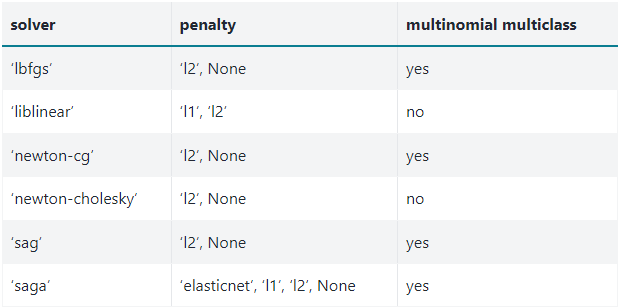

**6. multi-class**
ovr: for every class logistic regression model is trained

**7. verbose**
If you want to see results during training stages then make it 1

**8. warm_start**
Resume the training from where left

**9. n_jobs**
number of cores to use, -1 means all cores

**10. l1_ratio**
when we use elastic net regression. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

In [60]:
import pandas as pd
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [61]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
X = data.drop(columns = 'Outcome')
y = data['Outcome']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

In [64]:
y_train

695    1
119    0
135    0
675    1
326    1
      ..
321    1
581    0
121    0
238    1
681    1
Name: Outcome, Length: 576, dtype: int64

In [65]:
from sklearn.linear_model import LogisticRegression
# keep all default values
model = LogisticRegression(max_iter = 10000, random_state = 16)

In [66]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=16)

In [67]:
y_pred = model.predict(X_test)

In [69]:
model.score(X_test, y_test)

0.8229166666666666

The score of model is 80 percent whichis very good. We can make a confusion matrix of our model to see the predictions.

In [68]:
from sklearn import metrics

metrics.confusion_matrix(y_test, y_pred)

array([[116,   9],
       [ 25,  42]])

1. True Positives (TP): The model correctly predicted the positive class (Yes).The patient had diabetes and model also predicted. Count: 42
2. True Negatives (TN): The model correctly predicted the negative class (No).Count: 116
3. False Positives (FP): The model incorrectly predicted the positive class (Yes) when the actual class was negative (No).Count: 9
4. False Negatives (FN): The model incorrectly predicted the negative class (No) when the actual class was positive (Yes).Count: 25

Another way to see the best parameters for our model is to use GridSearch to evaluate our model.

In [106]:
param_grid = {
    'logisticregression__multi_class': ['ovr'],
    'logisticregression__penalty': ['l1'],
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__max_iter': [100000]
}

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create a pipeline with scaler and logistic regression
pipe = make_pipeline(LogisticRegression())

In [107]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [118]:
from sklearn.model_selection import GridSearchCV
# Create GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs = -1)

In [93]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__multi_class': ['ovr'],
                         'logisticregression__penalty': ['l1'],
                         'logisticregression__solver': ['liblinear', 'saga']})

In [119]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__max_iter': [100000],
                         'logisticregression__multi_class': ['ovr'],
                         'logisticregression__penalty': ['l1'],
                         'logisticregression__solver': ['liblinear', 'saga']})

In [120]:
grid_search.score(X_test, y_test)

0.8177083333333334

In [121]:
grid_search.best_params_

{'logisticregression__max_iter': 100000,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

From the above output we can see that the best parmeters for our data are 
1. max_iter: 100000,
2. multi_class: ovr,
3. penalty: l1,
4. solver: liblinear

In [122]:
param_grid = {
    'logisticregression__multi_class': ['ovr'],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs', 'sag', 'newton-cg', 'liblinear', 'saga'],
    'logisticregression__max_iter': [1000, 10000, 100000]
}

In [123]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create a pipeline with scaler and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
from sklearn.model_selection import GridSearchCV
# Create GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [124]:
grid_search.score(X_test, y_test)


0.8177083333333334

---
# **2. k-Nearest Neighbors (k-NN)**
K-Nearest Neighbors (KNN) is a simple, instance-based machine learning algorithm used for classification and regression tasks. It works by finding the k closest training examples to a given query point and making predictions based on the majority class (for classification) or the average (for regression) of those neighbors.

### **Working Principle**

**1. Distance Calculation:**

For a new data point, calculate the distance between it and all training points using a distance metric (e.g., Euclidean distance).

**2. Finding Neighbors:**

Identify the k nearest neighbors based on the calculated distances.

**3. Prediction:**
Predict the class that is most common among the k nearest neighbors.

## **Parameters:**
**1. n_neighbors:**

Number of neighbors to use (k).
Default is 5.

**2. weights:**
Determines how to weight the neighbors.
Options: 'uniform' (equal weight), 'distance' (weight by inverse distance), or a callable function.

**3. algorithm:**
Algorithm used to compute the nearest neighbors.
Options: 'auto', 'ball_tree', 'kd_tree', 'brute'.
'auto' attempts to choose the best algorithm based on the values passed to fit() method.

**4. p:**
Power parameter for the Minkowski metric (distance metric).
p = 1 corresponds to the Manhattan distance, p = 2 to the Euclidean distance.

**5. metric:**
The distance metric to use for the tree.
Default is 'minkowski', which allows for generalized distances with the p parameter.

Here I am using a Diabetes dataset that oredicts whether a patient has diabetes or not based on several data features.

In [158]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [161]:
X = data.drop(columns = 'Outcome')
y = data['Outcome']

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

In [164]:
X_train =  scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [165]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2)

In [166]:
model.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=2)

In [167]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8489583333333334

If we want to see how many neighbours give the best results for our data we can record the accuracy score using values from 1 to 16 and see the results.

In [170]:
scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f'Neighbour {i}, Accuracy {acc}')

Neighbour 1, Accuracy 0.7291666666666666
Neighbour 2, Accuracy 0.734375
Neighbour 3, Accuracy 0.7864583333333334
Neighbour 4, Accuracy 0.7552083333333334
Neighbour 5, Accuracy 0.7708333333333334
Neighbour 6, Accuracy 0.7916666666666666
Neighbour 7, Accuracy 0.796875
Neighbour 8, Accuracy 0.78125
Neighbour 9, Accuracy 0.7760416666666666
Neighbour 10, Accuracy 0.7708333333333334
Neighbour 11, Accuracy 0.765625
Neighbour 12, Accuracy 0.7708333333333334
Neighbour 13, Accuracy 0.7604166666666666
Neighbour 14, Accuracy 0.7552083333333334
Neighbour 15, Accuracy 0.78125


From the above output we can see that our model best performs on model if select 7 Nearest neighbours fr our classification tasks.

---
# **3. Support Vector Machines(SVM)**
SVM algorithms are very effective as we try to find the maximum separating hyperplane between the different classes available in the target feature.

- SVM is a supervised machine learning algorithm used for both regression and classification tasks.
- The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space.
- Let’s consider two independent variables x1, x2, and one dependent variable which is either a blue circle or a red circle.

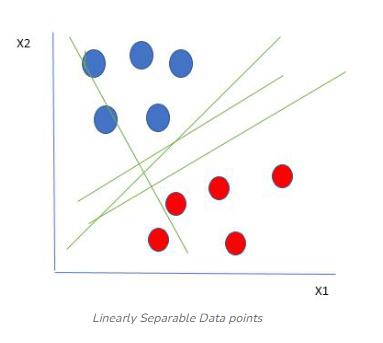

From the above figure we can clearly see that there can be multiple lines that can classify our data. The main aim of SVM is to find the optimal hyperplane that classifies the data-points.

## **SVM Working:**
- SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. 
- A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane. 
- Following this, characteristics of new data can be used to predict the group to which a new record should belong.

### **Linear SVM**
First we will apply SVM to a linealy separable data and see the results.

In [166]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 200, centers = 2, cluster_std = 0.6, random_state = 0)

In [167]:
X.shape

(200, 2)

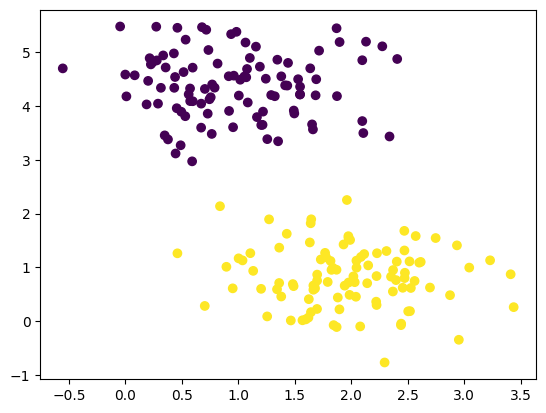

In [168]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c = y)

In [169]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X , y)

SVC(kernel='linear')

Here I have created a function to plot the Classifier that classifies our data

In [170]:
def plot_svc(model, ax=None, plot_support=True):    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### **Regularization effect on almost Linearly separable data**

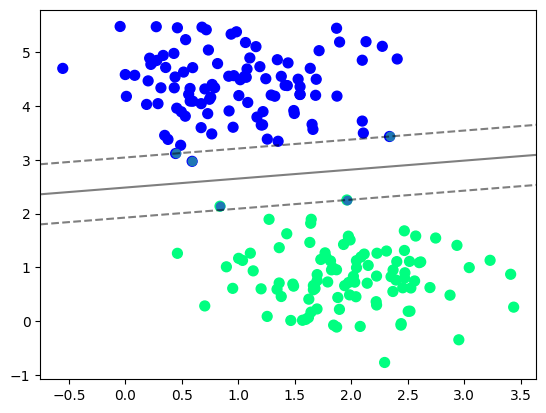

In [171]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc(model)

Now let's increase our samples and se the results of regularization on the model.

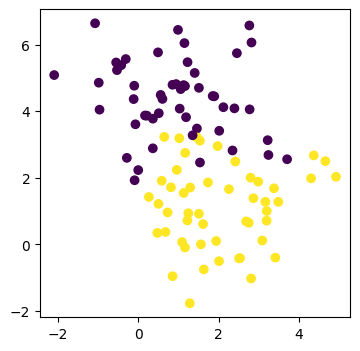

In [172]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, cluster_std = 1.2, random_state = 0)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c = y)

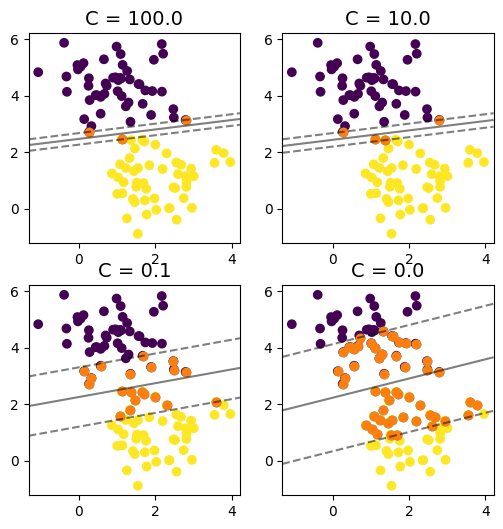

In [173]:
X, y = make_blobs(n_samples = 100, centers = 2, cluster_std = 0.8, random_state = 0)

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax = ax.flatten()

for axi, C in zip(ax, [100.0, 10.0, 0.1, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y)
    plot_svc(model, axi)
    axi.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],);
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### **Non Linearly Separable Data**
Now we will apply SVM to a data that cannot be separated using Linear classifier.

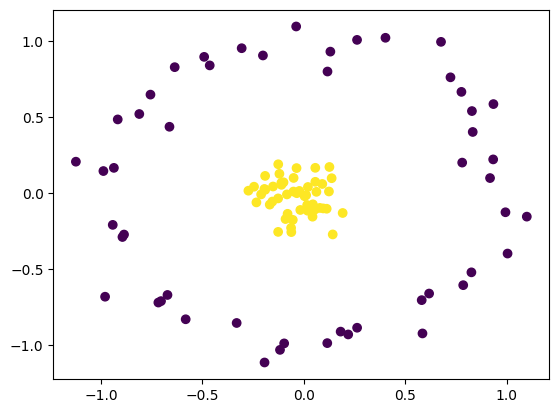

In [181]:
from sklearn.datasets import make_circles
X, y = make_circles(100, noise = 0.1, factor = 0.1)

plt.scatter(X[:, 0], X[:, 1], c=y)

First let's see the result of applying linear SVM to our data.

In [182]:
model = SVC(kernel = 'linear')
model.fit(X, y)

SVC(kernel='linear')

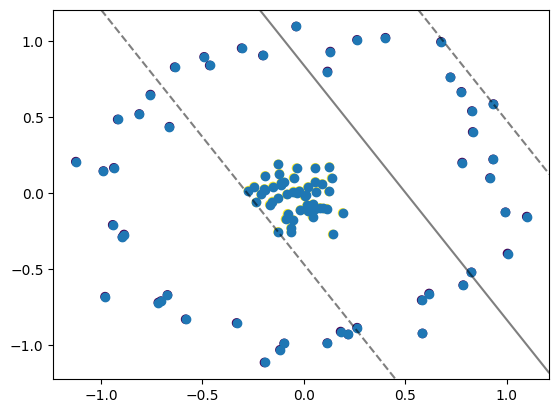

In [183]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plot_svc(model)

From the above plot we can see that SVM could not be calssified because data was not linearly separable.

In the original feature space, data points might not be separable by a straight line (in 2D) or a hyperplane (in higher dimensions). This makes it challenging to use a linear classifier like a basic SVM.

To cater this problem we use kernel trick.
#### **kernel trick** 
- The kernel trick involves using a mathematical function (kernel) to transform the input data into a higher-dimensional space without explicitly computing the coordinates of the data in that space. This transformation makes it possible to find a hyperplane that can linearly separate the data points in this new space.
- Common kernels include:
   - Linear Kernel: Suitable when the data is already linearly separable.
   - Polynomial Kernel: Maps data to a higher polynomial feature space.
   - Radial Basis Function (RBF) or Gaussian Kernel: Maps data to an infinite-dimensional space, effective for non-linearly separable data.
   - Sigmoid Kernel: Similar to neural networks and can mimic their behavior.

To see how we can transform our data from lower dimensional to higher dimensional, let;s plot our data from 2D to 3D.

In [184]:
def plot_3d_plot(X, y):
    # RBF Function
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

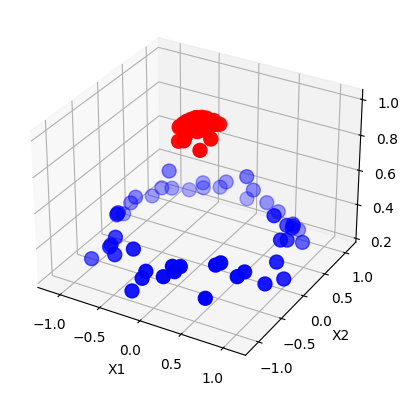

In [185]:
plot_3d_plot(X,y)

From the above plot we can clearly see that our data that was not separated in 2D can be easily separated using a hyperplane in 3D. That's the whole idea. Now we will use RBF abd polynomial function to classify our data.

In [186]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X, y)

SVC()

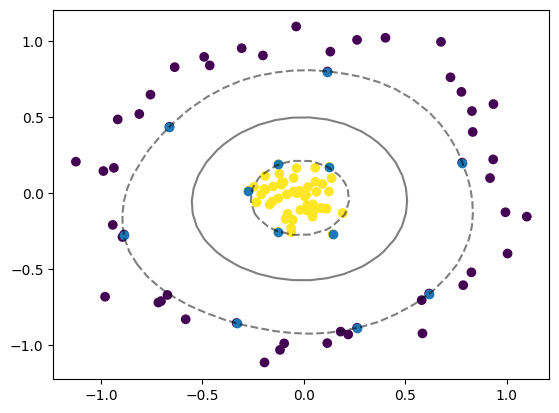

In [187]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plot_svc(rbf_classifier)

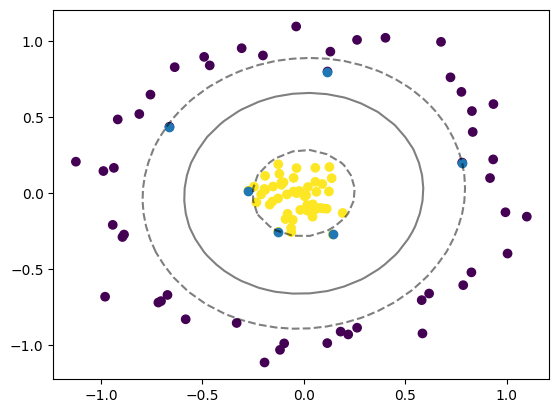

In [197]:
rbf_classifier = SVC(kernel="poly", degree = 2)
rbf_classifier.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y)
plot_svc(rbf_classifier)

---
# **4. Decision Trees**
Decision trees are a versatile machine learning algorithm that can be used for both classification and regression tasks. They work by recursively splitting the data into subsets based on feature values, leading to a tree-like structure of decisions.

### **Decision Trees Working**
**1. Node and Branches:**
- **Root Node:** The top-most node representing the entire dataset.
- **Decision Nodes:** Nodes where the data is split based on a feature and a threshold.
- **Leaf Nodes:** Terminal nodes representing the outcome or class label.

**2. Splitting Criterion:**
- Decision trees split the data at each node based on a criterion that maximizes the separation of the classes or minimizes the regression error.
- **Common Criteria:**
   - Gini Impurity: Measures the frequency of misclassification.
   - Entropy: Related to the information gain and measures the homogeneity of the sample.
   - Mean Squared Error (MSE): Used for regression tasks to minimize the variance within each leaf.

**3. Recursive Splitting:**

The process of splitting continues recursively, creating branches and nodes until a stopping condition is met, such as a maximum depth or a minimum number of samples per leaf.

**4. Pruning:**

To avoid overfitting, trees can be pruned by removing branches that have little importance. This can be controlled through parameters like maximum depth and minimum samples per leaf.


### **Key Parameters in Scikit-learn**

**1. criterion:**

The function to measure the quality of a split.
Options: 'gini', 'entropy' for classification; 'mse', 'friedman_mse', 'mae' for regression.

**2. max_depth:**

The maximum depth of the tree. Limiting depth can prevent overfitting.

**3. min_samples_split:**

The minimum number of samples required to split an internal node.

**4. min_samples_leaf:**

The minimum number of samples required to be at a leaf node.

**5. max_features:**

The number of features to consider when looking for the best split. Reducing this can speed up the training and reduce overfitting.

**6. random_state:**

Controls the randomness of the estimator for reproducibility.

In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.iloc[:, 0:8].values
y = data.iloc[: , -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [4]:
X.shape, y.shape

((768, 8), (768,))

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6948051948051948

[Text(0.5, 0.875, 'x[1] <= 142.5\ngini = 0.446\nsamples = 614\nvalue = [408, 206]'),
 Text(0.25, 0.625, 'x[5] <= 26.95\ngini = 0.358\nsamples = 480\nvalue = [368, 112]'),
 Text(0.125, 0.375, 'x[1] <= 124.5\ngini = 0.073\nsamples = 132\nvalue = [127, 5]'),
 Text(0.0625, 0.125, 'gini = 0.035\nsamples = 112\nvalue = [110, 2]'),
 Text(0.1875, 0.125, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.375, 0.375, 'x[7] <= 29.5\ngini = 0.426\nsamples = 348\nvalue = [241, 107]'),
 Text(0.3125, 0.125, 'gini = 0.291\nsamples = 187\nvalue = [154, 33]'),
 Text(0.4375, 0.125, 'gini = 0.497\nsamples = 161\nvalue = [87, 74]'),
 Text(0.75, 0.625, 'x[7] <= 59.5\ngini = 0.419\nsamples = 134\nvalue = [40, 94]'),
 Text(0.625, 0.375, 'x[1] <= 154.5\ngini = 0.397\nsamples = 128\nvalue = [35, 93]'),
 Text(0.5625, 0.125, 'gini = 0.495\nsamples = 42\nvalue = [19, 23]'),
 Text(0.6875, 0.125, 'gini = 0.303\nsamples = 86\nvalue = [16, 70]'),
 Text(0.875, 0.375, 'x[6] <= 0.678\ngini = 0.278\nsamples = 6\nvalu

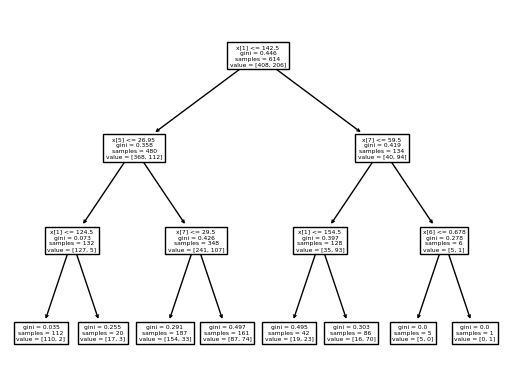

In [22]:
from sklearn.tree import plot_tree
plot_tree(model)

In [23]:
para = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8]
}

In [24]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(model, para, cv = 3, n_jobs = -1)
model_cv.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [25]:
y_pred = model_cv.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7077922077922078

In [26]:
model_cv.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [27]:
model_cv.best_score_

0.7329507412721186

In [28]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, criterion = 'gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7077922077922078

[Text(0.5648148148148148, 0.9, 'x[1] <= 142.5\ngini = 0.446\nsamples = 614\nvalue = [408, 206]'),
 Text(0.2962962962962963, 0.7, 'x[5] <= 26.95\ngini = 0.358\nsamples = 480\nvalue = [368, 112]'),
 Text(0.14814814814814814, 0.5, 'x[1] <= 124.5\ngini = 0.073\nsamples = 132\nvalue = [127, 5]'),
 Text(0.07407407407407407, 0.3, 'x[5] <= 26.4\ngini = 0.035\nsamples = 112\nvalue = [110, 2]'),
 Text(0.037037037037037035, 0.1, 'gini = 0.019\nsamples = 106\nvalue = [105, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2222222222222222, 0.3, 'x[5] <= 9.8\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.18518518518518517, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25925925925925924, 0.1, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.4444444444444444, 0.5, 'x[7] <= 29.5\ngini = 0.426\nsamples = 348\nvalue = [241, 107]'),
 Text(0.37037037037037035, 0.3, 'x[5] <= 45.4\ngini = 0.291\nsamples = 187\nvalue = [154, 33]'),
 Text(0.3

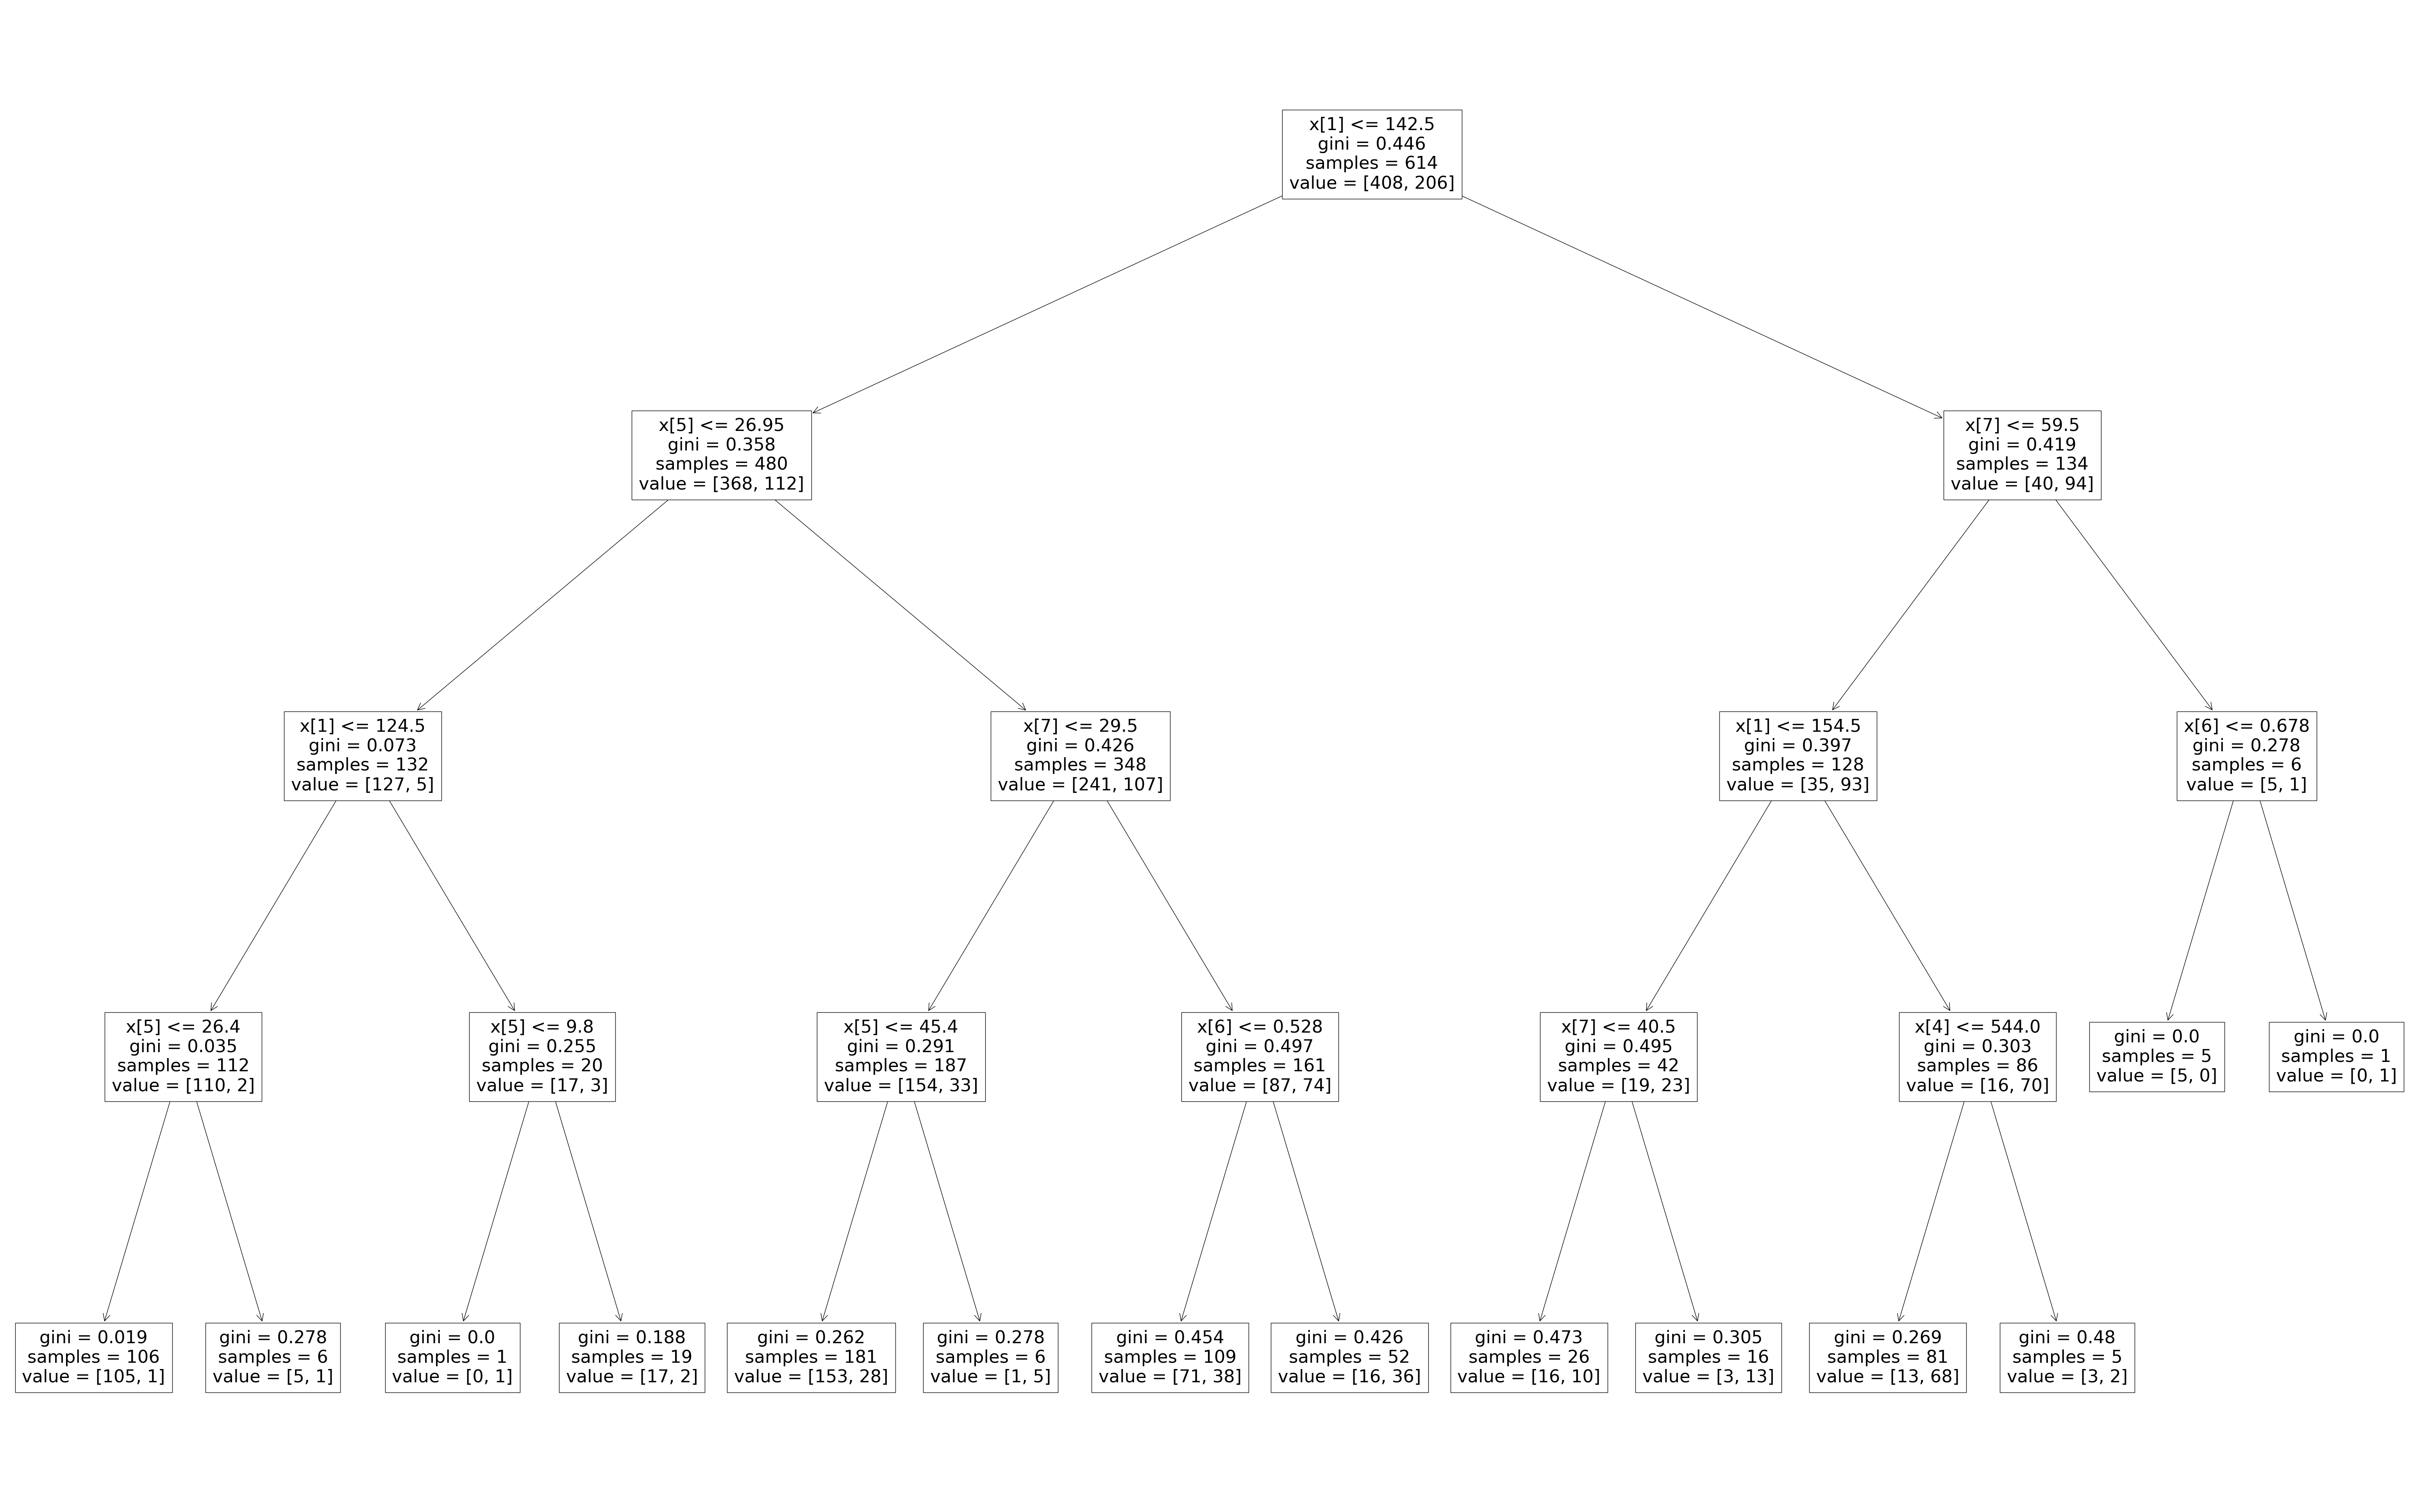

In [32]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
from sklearn.tree import plot_tree
plot_tree(model)

---
# **5. Random Forests**
Random forest is another supervised learning algorithm that is commonly used for both regression (random forest regressors) and classification problems (random forest classifiers). As the name may suggest, random forests rely on several decision tree algorithms, hence the name forest

### **Random Forest Working:**
- Random forests can be considered as a group of decision trees each giving a prediction and final predictin is made by the majority if tres in the forest.
- In order to create different decision trees based on a data set, random forests use bootstrap aggregating or bagging.
- In **bagging** random subsets of data are selected for each base line model. We can do either **row sampling**, **column sampling** or both.
   - The selection can be with or without replacement.      - **With replacement** means that once a data point is selected it is again added to the data and is availabble for the next slection. This means that duplicate data can appear for same decision tree can be used. 
   - But is **Without replacement** the data is not available for sampling once it is being selected for a decision tree.
- After the bagging is done the respective data is trained for each decision tree.
- The predictions are made using **Aggregation** of the prediction of each decision tree. If we want to make prediction the final prediction is decided on the majority decision of all thedecision trees in the forest.

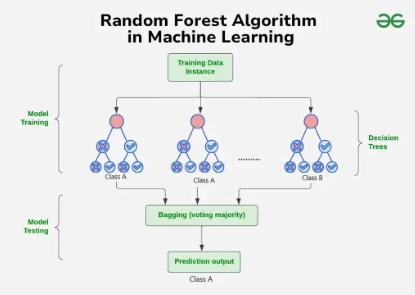

### **Random Forest in sklearn**
Now let's have a very quick demo on how we can train our model using random forest in sklearn.

First let's have a look on the important parameters that we need to adjust in our model:

**1. n_estimators:** The number of trees in the forest. Default is 100.

**2.criterion:** `gini` for Gini Impurity, `log_loss` and `entropy` for Shannon information gain.Default is `gini`.

**3. max_depth:** Maximum depth of the tree. Default is None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**4. max_features:**
The number of features to consider when looking for the best split:
- If int, then consider max_features features at each split.
- If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
- If `sqrt`, then max_features=sqrt(n_features).
- If `log2`, then max_features=log2(n_features).
- If None, then max_features=n_features.

**5. bootstrap**
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

**6. oob_score:** In a Random Forest model, each tree within the ensemble calculates the Out-of-Bag (OOB) error using the data samples it did not select for training during the bootstrap sampling process. 

**7. max_samples:**
If bootstrap is True, the number of samples to draw from X to train each base estimator.
- If None (default), then draw X.shape[0] samples.

- If int, then draw max_samples samples.

- If float, then draw max(round(n_samples * max_samples), 1) samples. Thus, max_samples should be in the interval (0.0, 1.0].

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Features
X = data.iloc[:, 0:8].values
# Target
y = data.iloc[:, -1].values

In [29]:
X.shape, y.shape

((768, 8), (768,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [35]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

### **Out-of-Bag(OOB) Score:**
OOB (out-of-bag) score is a performance metric for a machine learning model, specifically for ensemble models such as random forests. It is calculated using the samples that are not used in the training of the model, which is called out-of-bag samples. These samples are used to provide an unbiased estimate of the model’s performance, which is known as the OOB score.

In [39]:
model = RandomForestClassifier(n_estimators = 500, max_features = 4, max_samples = 0.5, oob_score=True)
model.fit(X_train,y_train)
model.oob_score_

0.7638436482084691

In [40]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

### **Difference between Bagging and Random Forest**
That was the basic behind the Random Forest.
Now we will see that if Random Forest use Bagging technique for classification then what is the difference between the two.

If we use all the base models as decision tree in bagging doesn't it become same as Random Forest. Well the answer is no?
- Bagging is a general method that can be applied to any base model and focuses on reducing variance by averaging predictions from multiple models.
- Random Forest is a specialized form of bagging that specifically uses decision trees and introduces additional randomness by selecting random subsets of features. This technique not only reduces variance but can also help in reducing bias.

In [42]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.103072,1.053276,-1.402725,1.196619,-0.350903,1
1,0.775250,-1.613692,-0.812857,-0.383983,-1.097679,1
2,-2.499196,-0.452928,-0.089366,-2.885760,-0.032824,0
3,-1.582230,-1.052500,0.727304,0.798842,-1.203299,1
4,-0.770881,-1.450936,-2.398617,1.803347,-1.833654,1


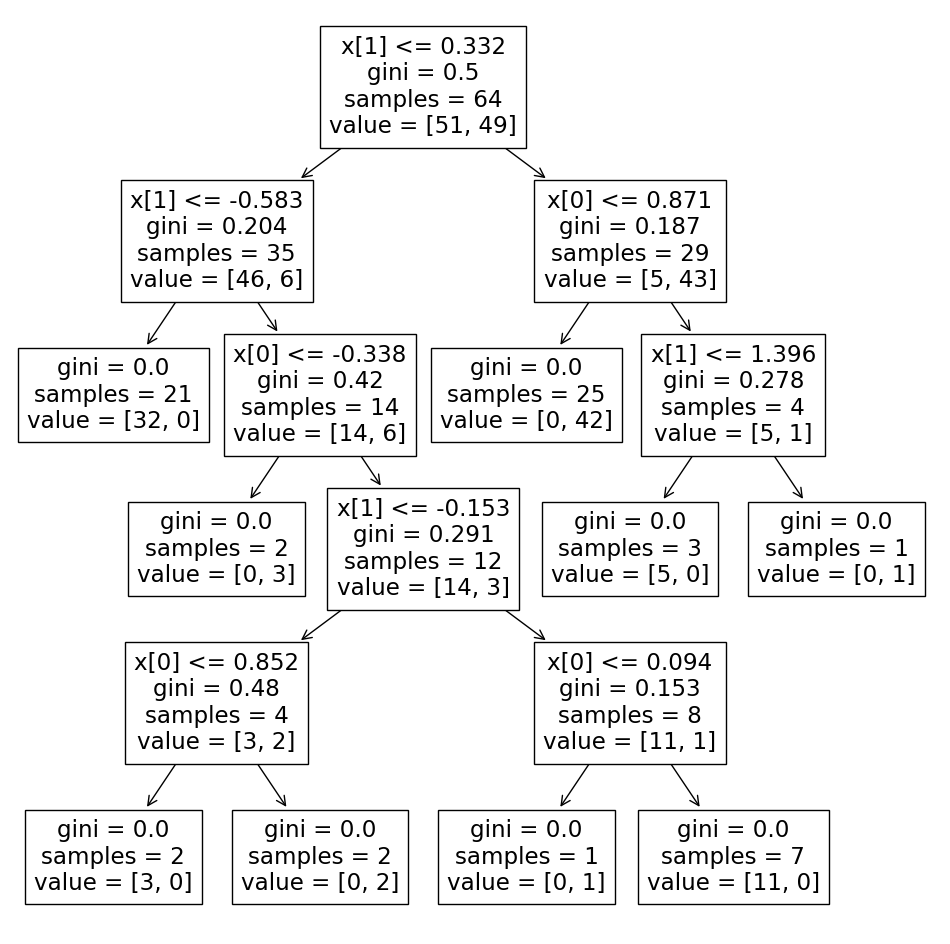

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()
     

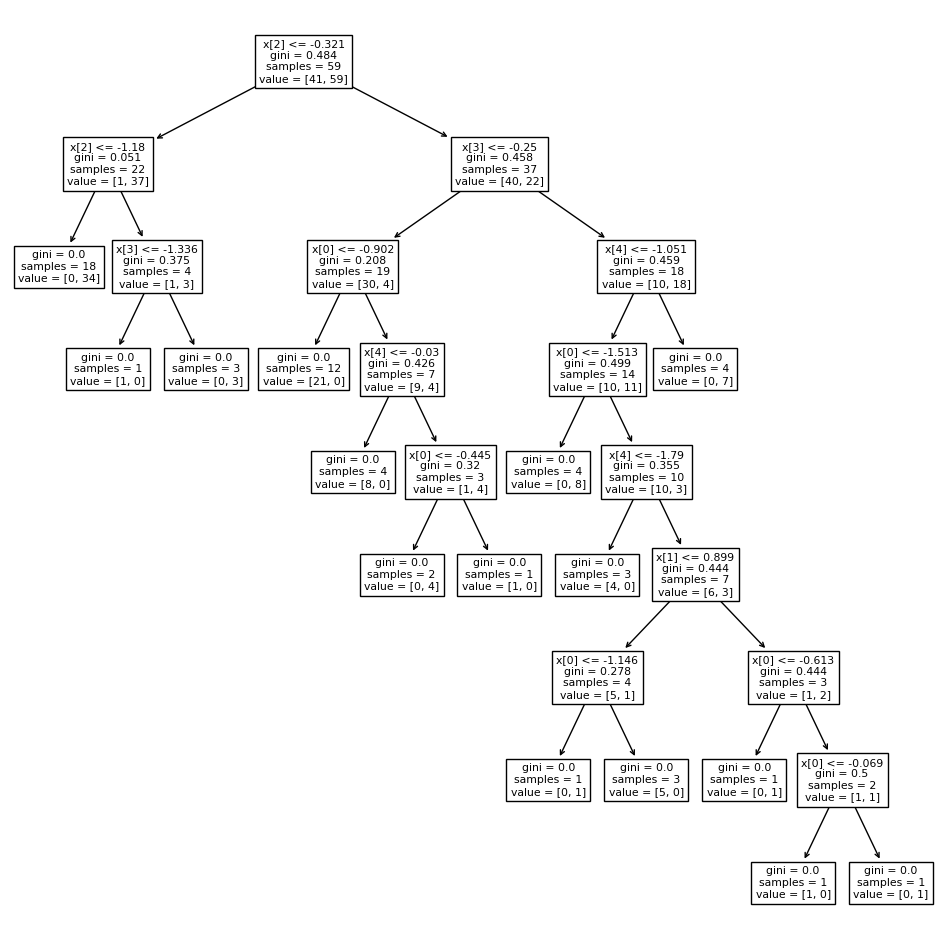

In [46]:
rf = RandomForestClassifier(max_features=2)

rf.fit(df.iloc[:,:5],df.iloc[:,-1])

plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()
     

From the above outputs we can clearly see that in case of Bagging only two features were selected for the whole tree. But in the case of Random Forests random sampling is done for each split in the tree. That is the key difference betwee bagging and Random Forest.

# **6. Gradient Boosting**
Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. 

The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

- Gradient Boosting updates the weights by computing the negative gradient of the loss function with respect to the predicted output.
- Gradient Boosting can use a wide range of base learners, such as decision trees, and linear models.
- Gradient Boosting is generally more robust, as it updates the weights based on the gradients, which are less sensitive to outliers.

### **Gradient Boosting in sklearn**
Now we will see how to use radient booting to train our data in sklearn. First we need to look at he important prameters for training.

**1. loss:** The loss function to be optimized. 
`log_loss` refers to binomial and multinomial deviance, the same as used in logistic regression. Can also use ` ‘exponential’`

**2. learning_rate:** Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

**3. n_estimators:** The number of boosting stages to perform.

**4. min_samples_split:** The minimum number of samples required to split an internal node.

**5. max_features:** The number of features to consider when looking for the best split:

- If int, values must be in the range [1, inf).

- If float, values must be in the range (0.0, 1.0] and the features considered at each split will be max(1, int(max_features * n_features_in_)).

- If ‘sqrt’, then max_features=sqrt(n_features).

- If ‘log2’, then max_features=log2(n_features).

- If None, then max_features=n_features.

We will use the classification data as we used above.

In [61]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 10000, n_features=50 )
df = pd.DataFrame(X)
df['target'] = y
print(df.shape)
df.head()

(10000, 51)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,0.004451,1.207304,1.611834,0.270528,0.322356,-0.458915,2.157822,1.747669,-0.984966,-4.151574,...,1.003264,0.996755,0.438036,-0.470545,1.329488,0.733198,-0.053268,0.397253,1.621334,1
1,-0.015011,0.366869,-0.013608,0.208818,-1.148637,0.227208,0.457531,0.375930,0.968400,0.073120,...,0.058762,0.580474,0.214235,-0.778942,-0.038991,1.955213,0.622036,0.365869,-0.059971,0
2,-0.275249,0.699328,-0.431838,-0.339080,-1.032643,-1.185345,0.169807,-1.278524,-0.393964,-1.179693,...,0.845560,0.299041,-1.318922,-0.203234,0.226168,-0.317459,-0.483158,-1.098985,0.525645,1
3,-1.080178,-1.563016,-1.337070,-0.223395,-1.377397,0.382443,-0.186522,1.899929,-1.485095,0.339890,...,0.835573,1.707673,1.087866,-1.509014,0.501498,0.271468,-2.206982,-0.511572,1.334873,1
4,-0.286872,-0.238258,-0.516834,-0.328887,-0.576500,0.680799,0.441974,1.445849,0.578950,-1.370299,...,1.162710,-0.574970,0.225593,-0.050967,-1.402555,-0.650678,0.860171,-1.118494,0.186090,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=600, learning_rate = 0.05, random_state = 100, max_features = 20 )

In [66]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9335

# **7. Naive Bayes**
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

- Naive Bayes is a family of probabilistic algorithms based on Bayes' Theorem, assuming independence between predictors. 
- It's particularly effective for classification tasks with categorical input data and works well even with small datasets. 
- Scikit-learn provides implementations for three types of Naive Bayes classifiers: Gaussian, Multinomial, and Bernoulli. Here's a complete coding guide to using these classifiers in Scikit-learn.

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Guassian Naive Bayes**
Gaussian Naive Bayes (GaussianNB) is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features. It is particularly suited for continuous data where the features are assumed to follow a Gaussian (normal) distribution. It is called "naive" because it assumes that all features are independent given the class label, which simplifies computation.

In [107]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [108]:
# Instantiate the model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
print("Gaussian Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))

Gaussian Naive Bayes
Accuracy: 0.9466666666666667
Confusion Matrix:
 [[21  0  0]
 [ 0 30  0]
 [ 0  4 20]]


## **Multinomial Naive Bayes**


In [109]:
df = pd.read_csv('/kaggle/input/play-tennis/play_tennis.csv')
df.drop(columns = 'day', inplace = True)
df.head()
from sklearn.preprocessing import LabelEncoder
# Apply LabelEncoder to each column in the DataFrame
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()
X = df.iloc[:, 0:4]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Instantiate the model
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train, y_train)

# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Evaluate the model
print("\nMultinomial Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))


Multinomial Naive Bayes
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[0 1]
 [0 2]]


Gaussian Naive Bayes is a straightforward and efficient classifier for continuous data where the features are assumed to be normally distributed. It performs well in practice even with the naive independence assumption and is especially useful when dealing with large datasets or when computational efficiency is a concern.